In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
plt.style.use('classic')
from BZI.all_2D import *

In [4]:
ndivs = 10
grid_basis = make2D_lattice_basis([1/ndivs,1/ndivs], np.pi/2)
get_2Dlattice_type(grid_basis)

'square'

In [5]:
lattice_basis = make2D_lattice_basis([1,1], np.pi/2)
offset = np.dot(inv(grid_basis), np.dot(lattice_basis, [-.5]*2)) + [.5]*2
grid = make_cell_points2D(lattice_basis, grid_basis, offset)

<IPython.core.display.Javascript object>


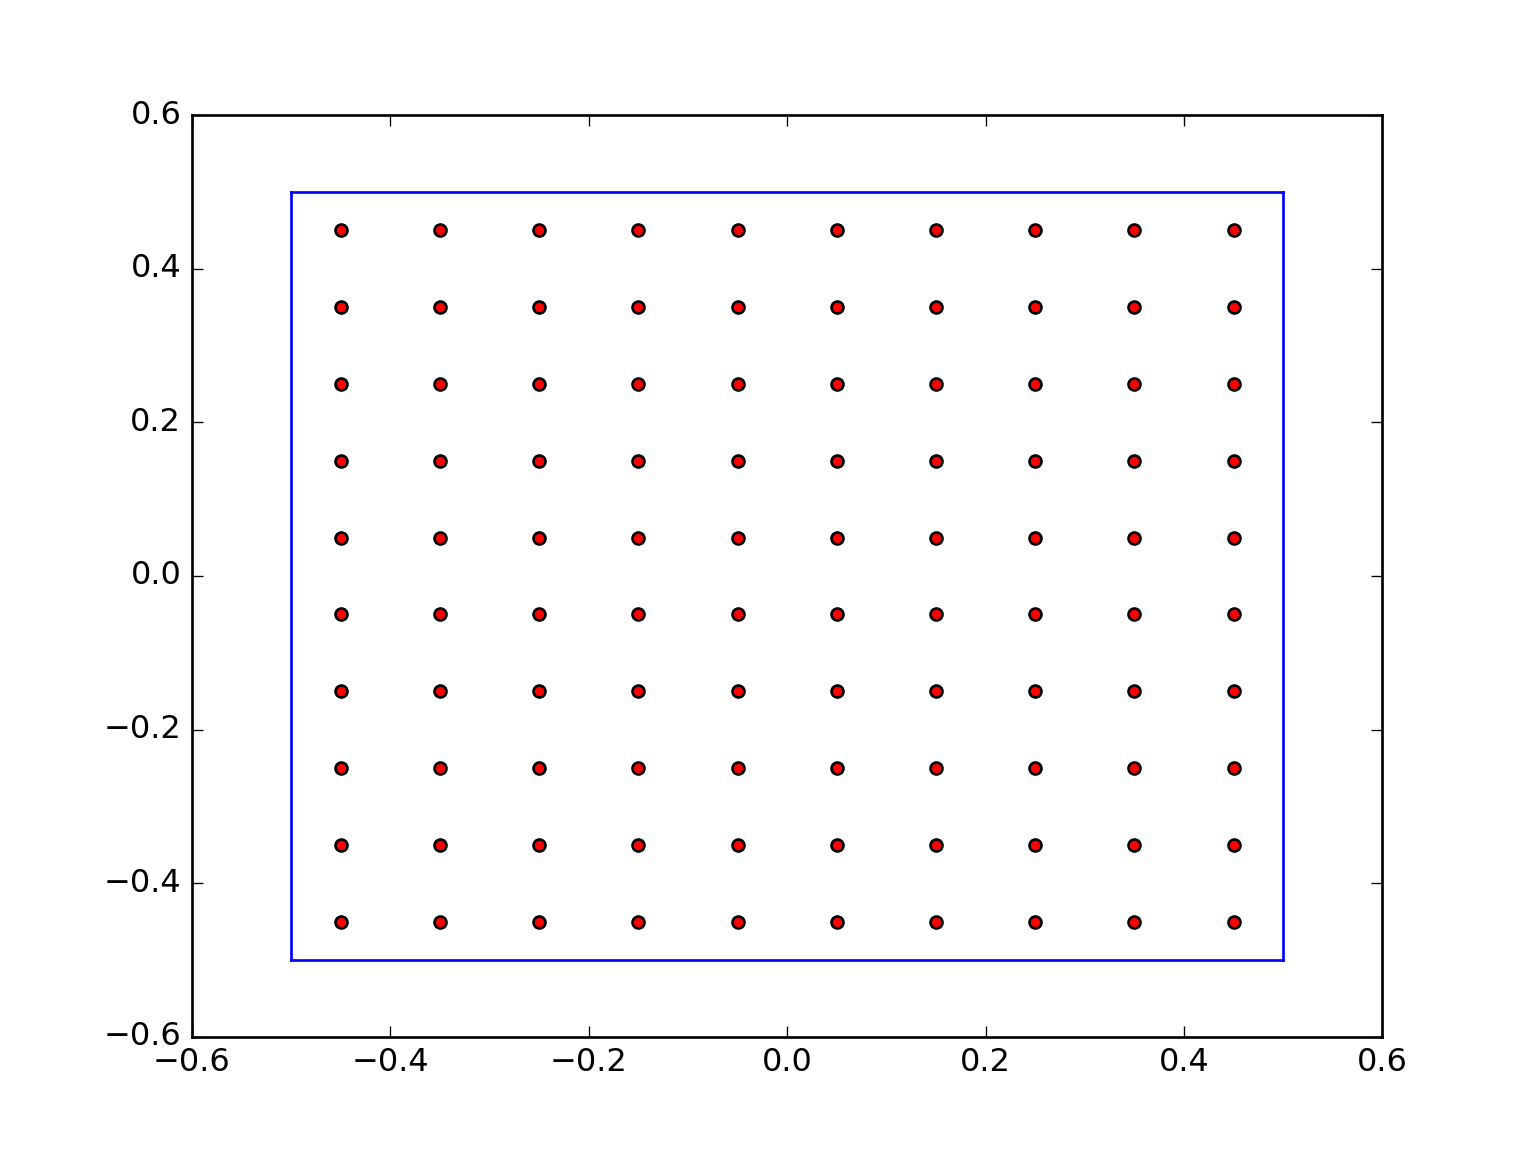

In [6]:
plot_offset = np.dot(lattice_basis, [-.5]*2)
plot_mesh2D(grid, lattice_basis, plot_offset)

<IPython.core.display.Javascript object>


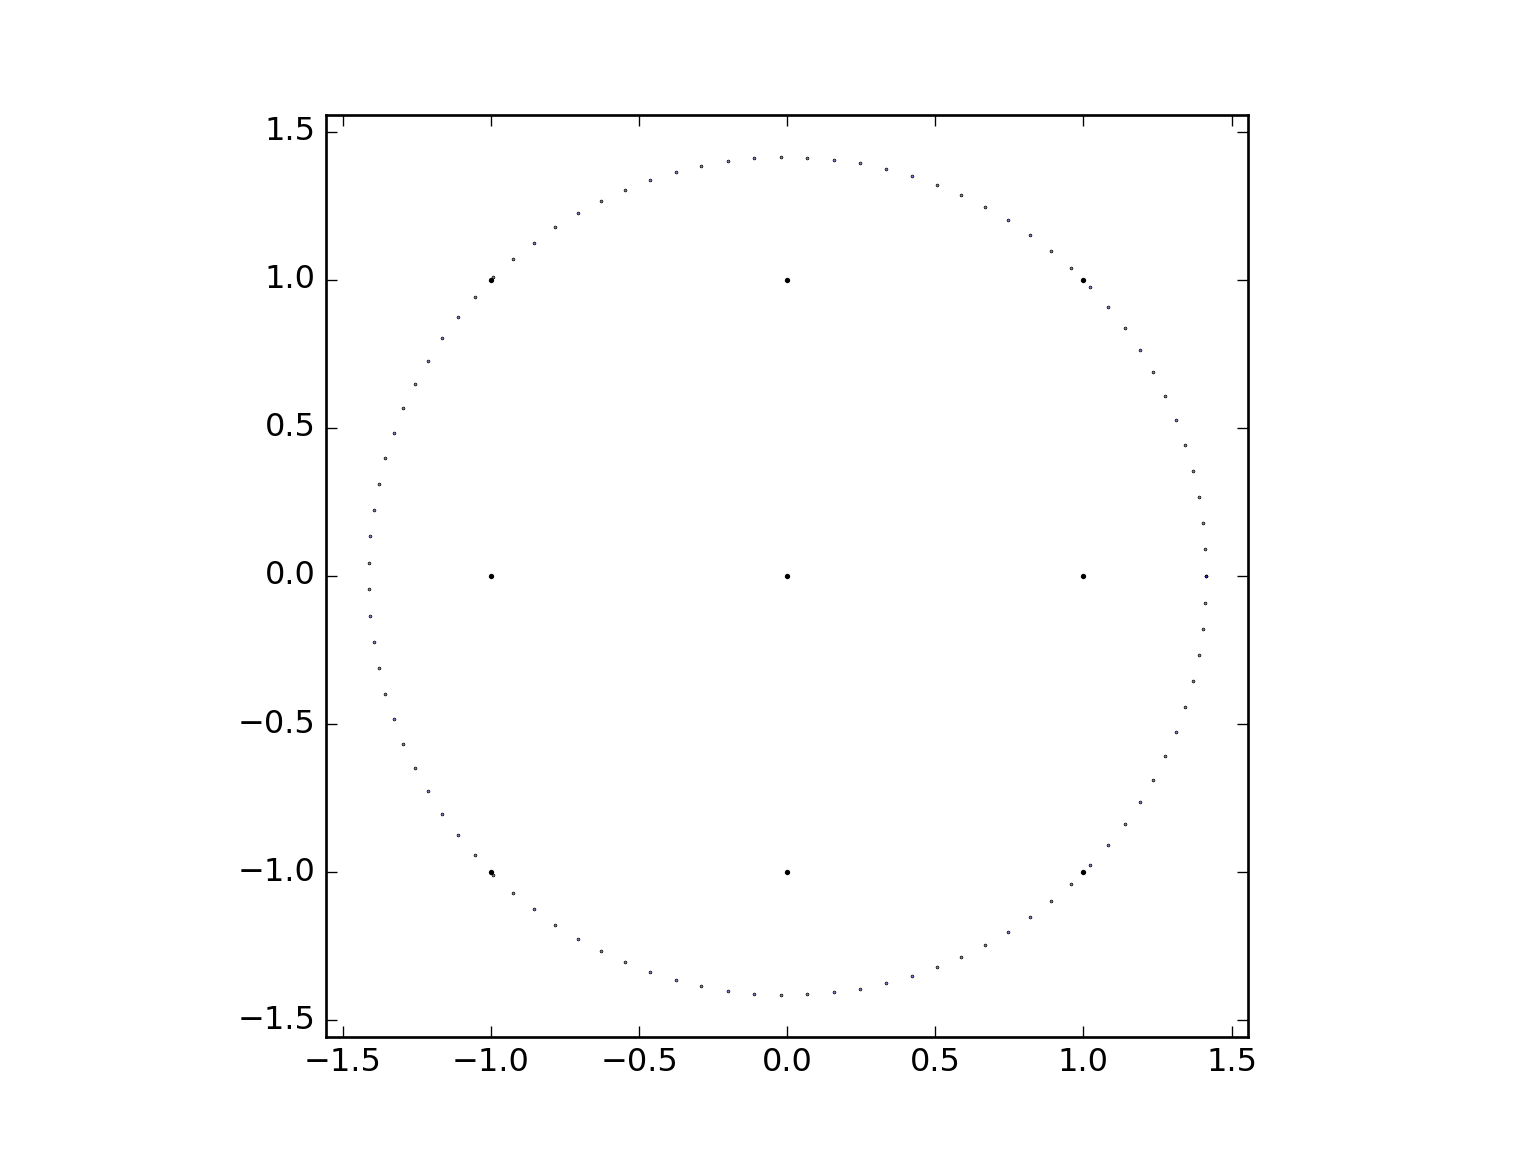

In [7]:
r2 = 2
circle_pts = get_circle_pts(lattice_basis, r2)
plot_circle_mesh(circle_pts, r2)

<IPython.core.display.Javascript object>


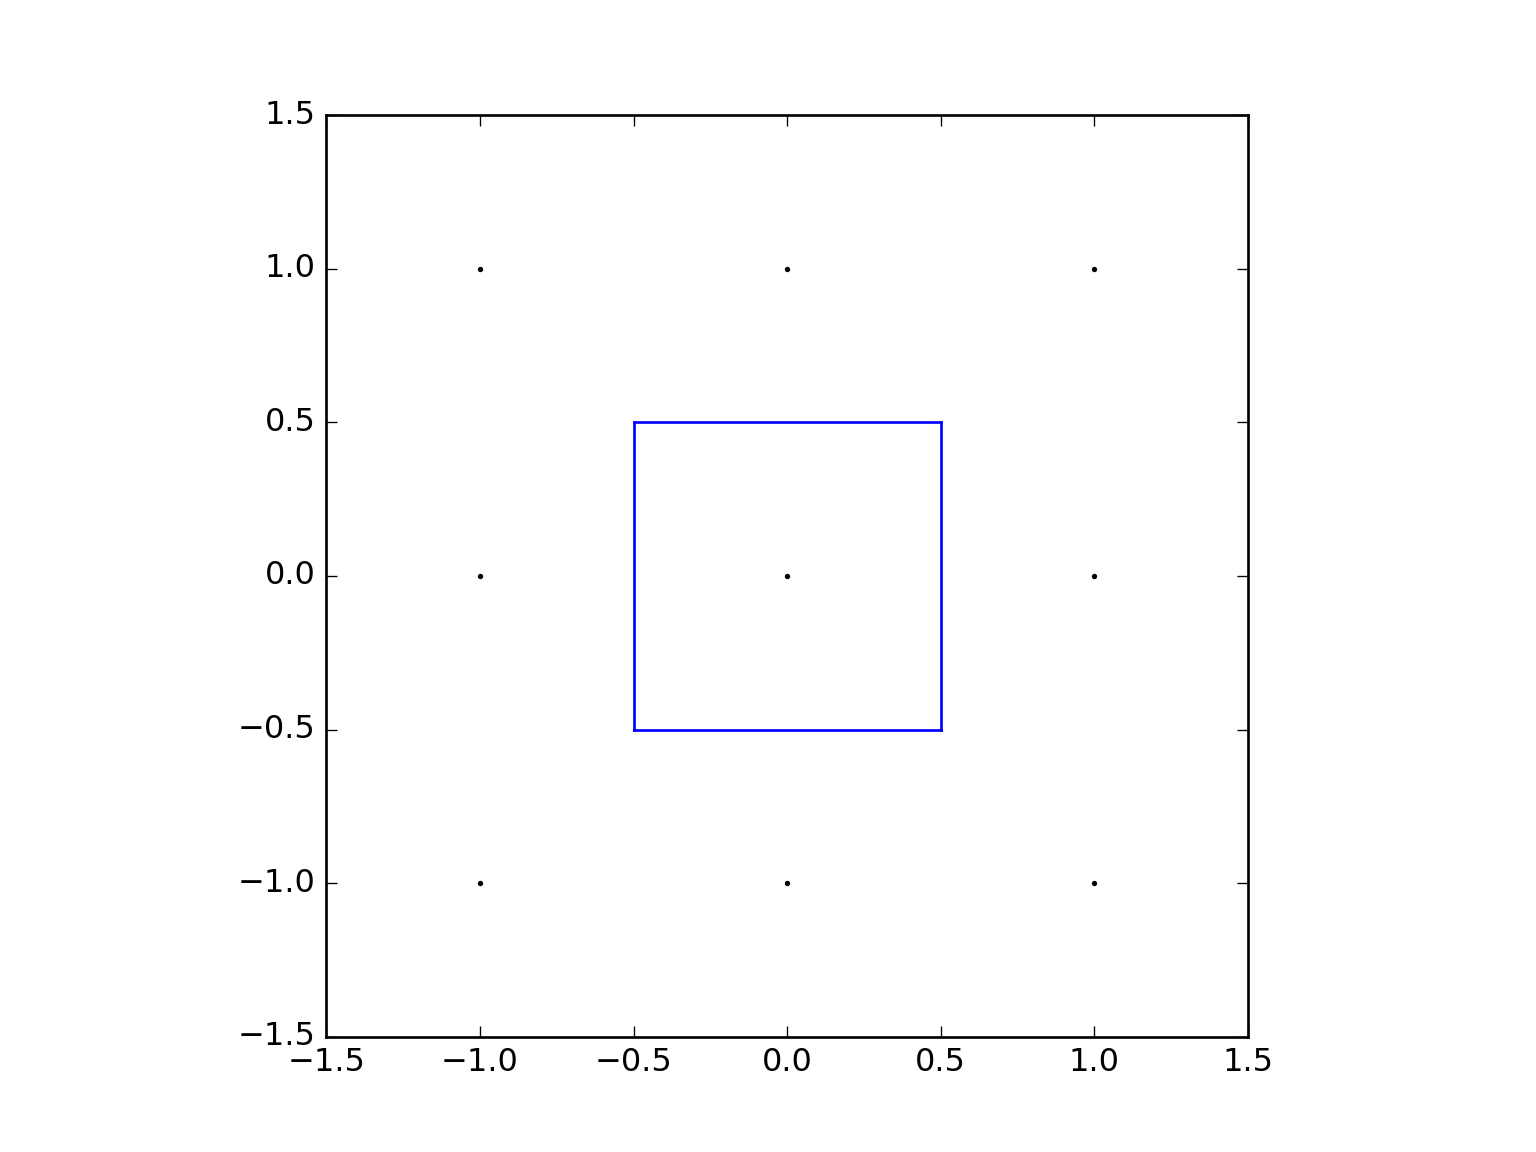

In [8]:
bz = find_2Dbz(lattice_basis)
plot_all2D_bz(circle_pts, bz)

In [8]:
lattice_basis = make2D_lattice_basis([1,1], np.pi/2)
args = {"lattice_basis": lattice_basis,
        "degree": 2,
        "prefactor":1,
        "nvalence_electrons": 3}

free_2D = FreeElectron2D(**args)

In [9]:
free_2D.band_energy_ans

0.35809862195676451

<IPython.core.display.Javascript object>


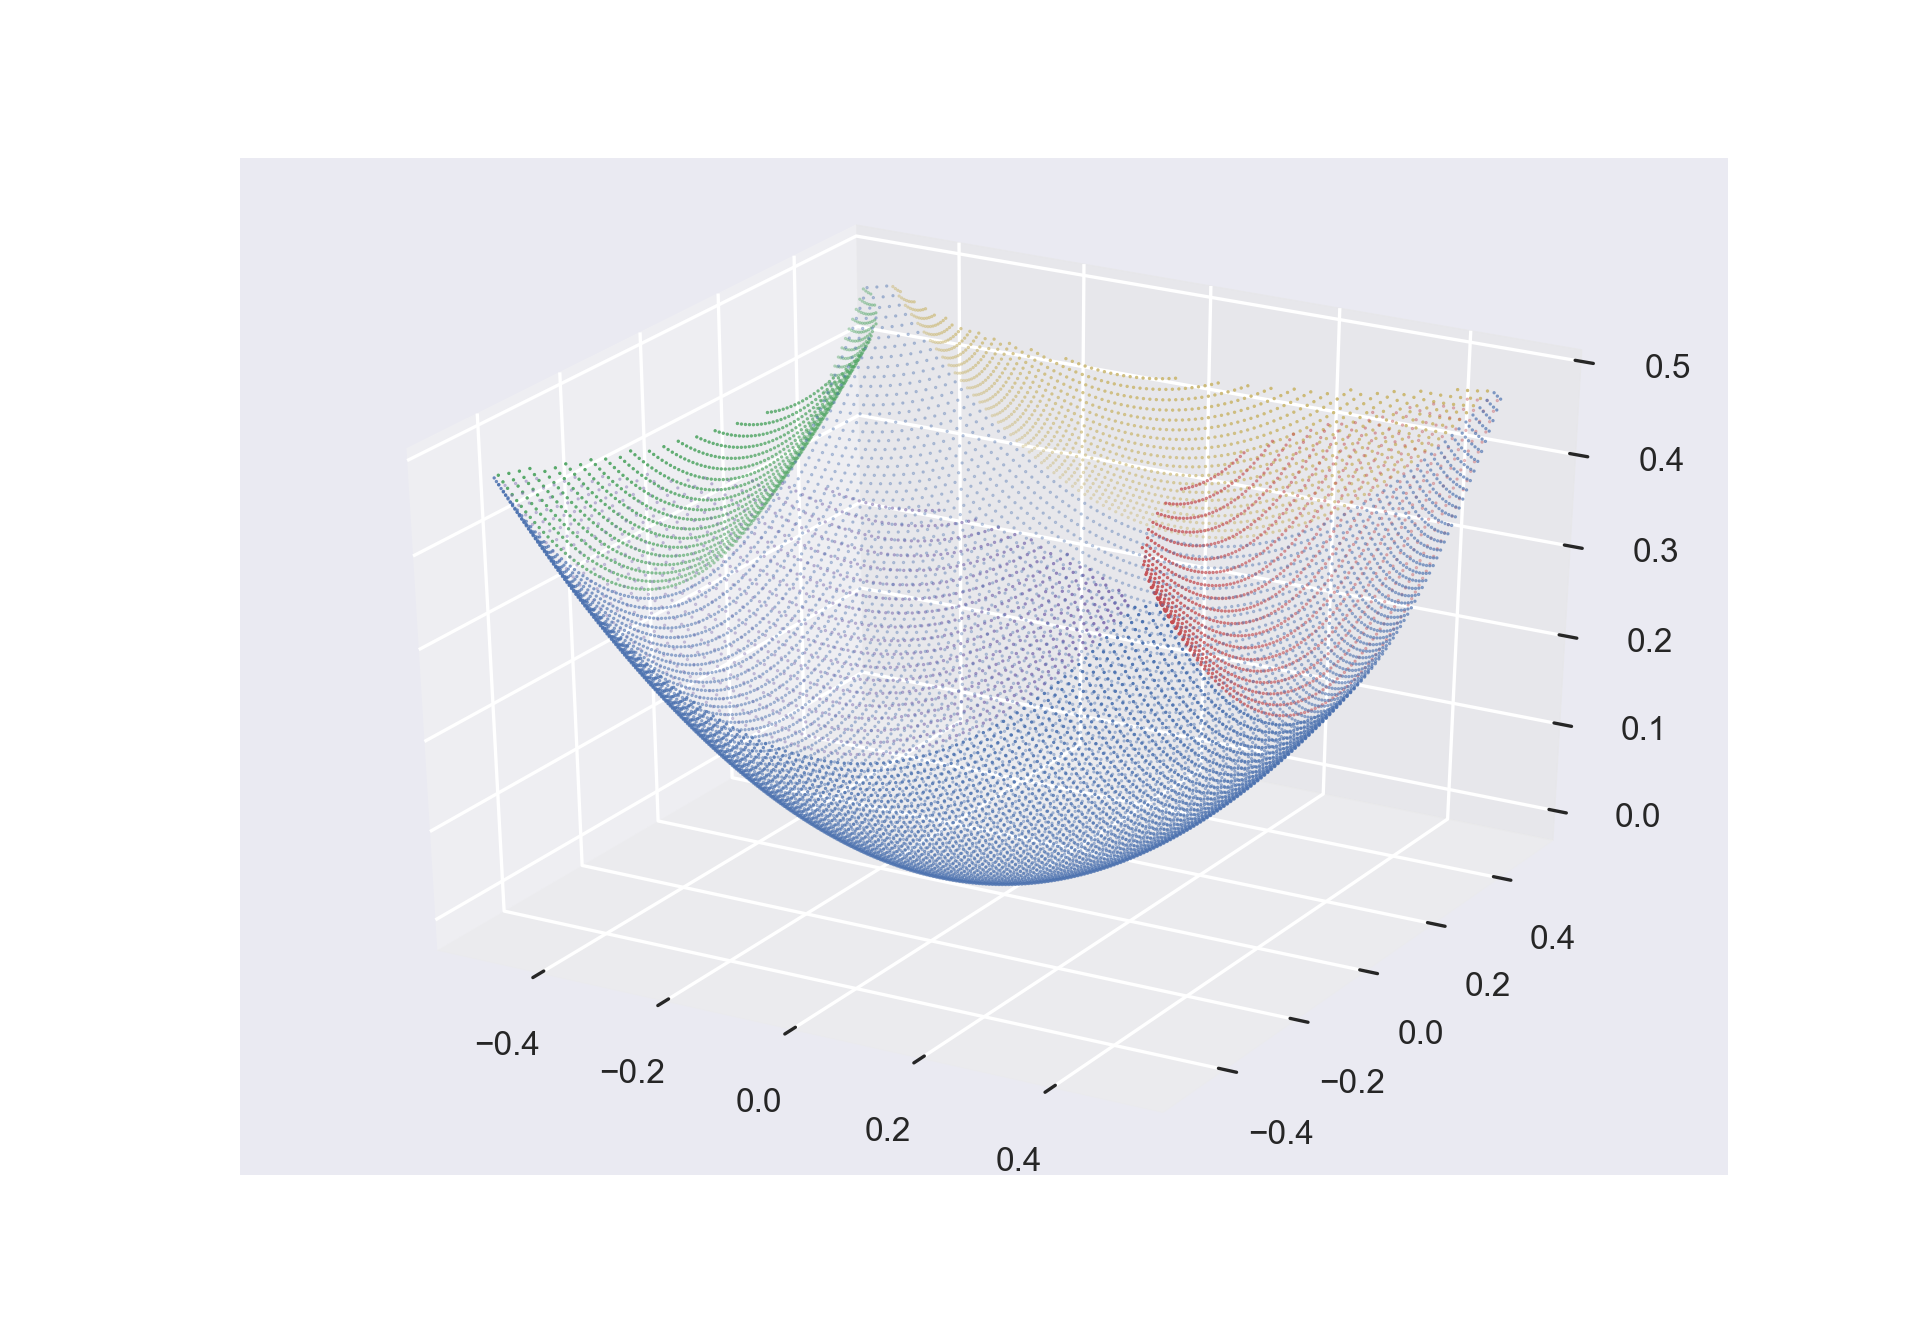

In [10]:
plot_2Dbands(free_2D, 5)

<IPython.core.display.Javascript object>


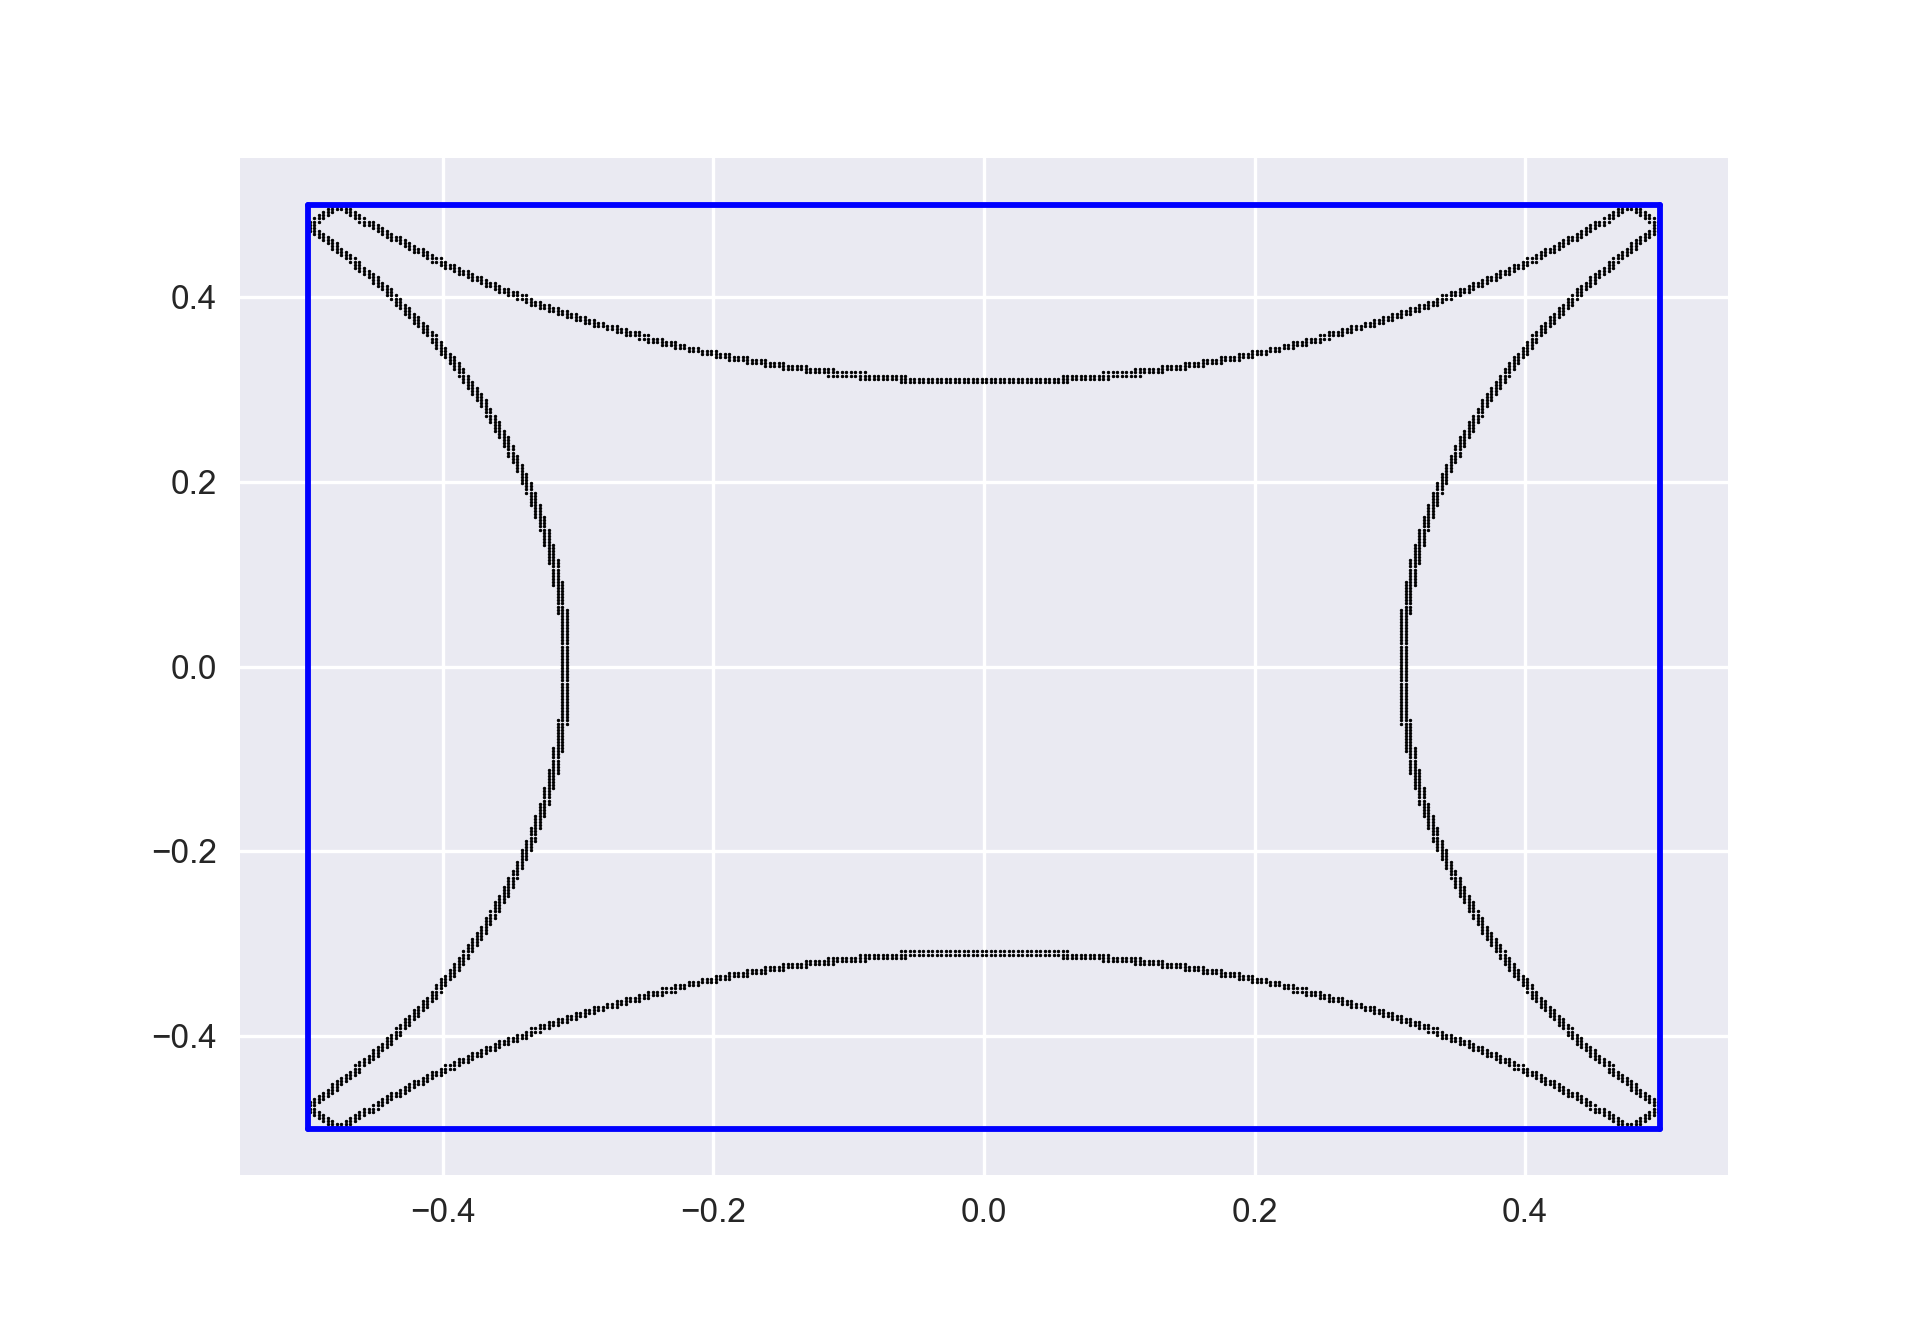

In [15]:
nbands = 5
ndivs = 300
free_2D.fermi_level = free_2D.fermi_level_ans
plot_2Dfermi_curve(free_2D, nbands, ndivs, atol=5e-3)o

In [17]:
fermi_level_error_list = []
fermi_level_list = []
band_energy_error_list = []
band_energy_list = []

ndivisions = np.array([int(1.5**n) for n in range(2,15)])
for ndivs in ndivisions:
    grid_basis = free_2D.lattice_basis/ndivs
    offset = np.dot(inv(grid_basis), np.dot(lattice_basis, [-.5]*2)) + [.5]*2    
    grid = make_cell_points2D(lattice_basis, grid_basis, offset)
    weights = np.ones(len(grid))
    fermi_level, band_energy = rectangular_integration2D(free_2D, grid, weights)
    
    fermi_level_list.append(fermi_level)
    band_energy_list.append(band_energy)    
    fermi_level_error_list.append(abs(fermi_level - free_2D.fermi_level_ans))
    band_energy_error_list.append(abs(band_energy - free_2D.band_energy_ans))

<IPython.core.display.Javascript object>


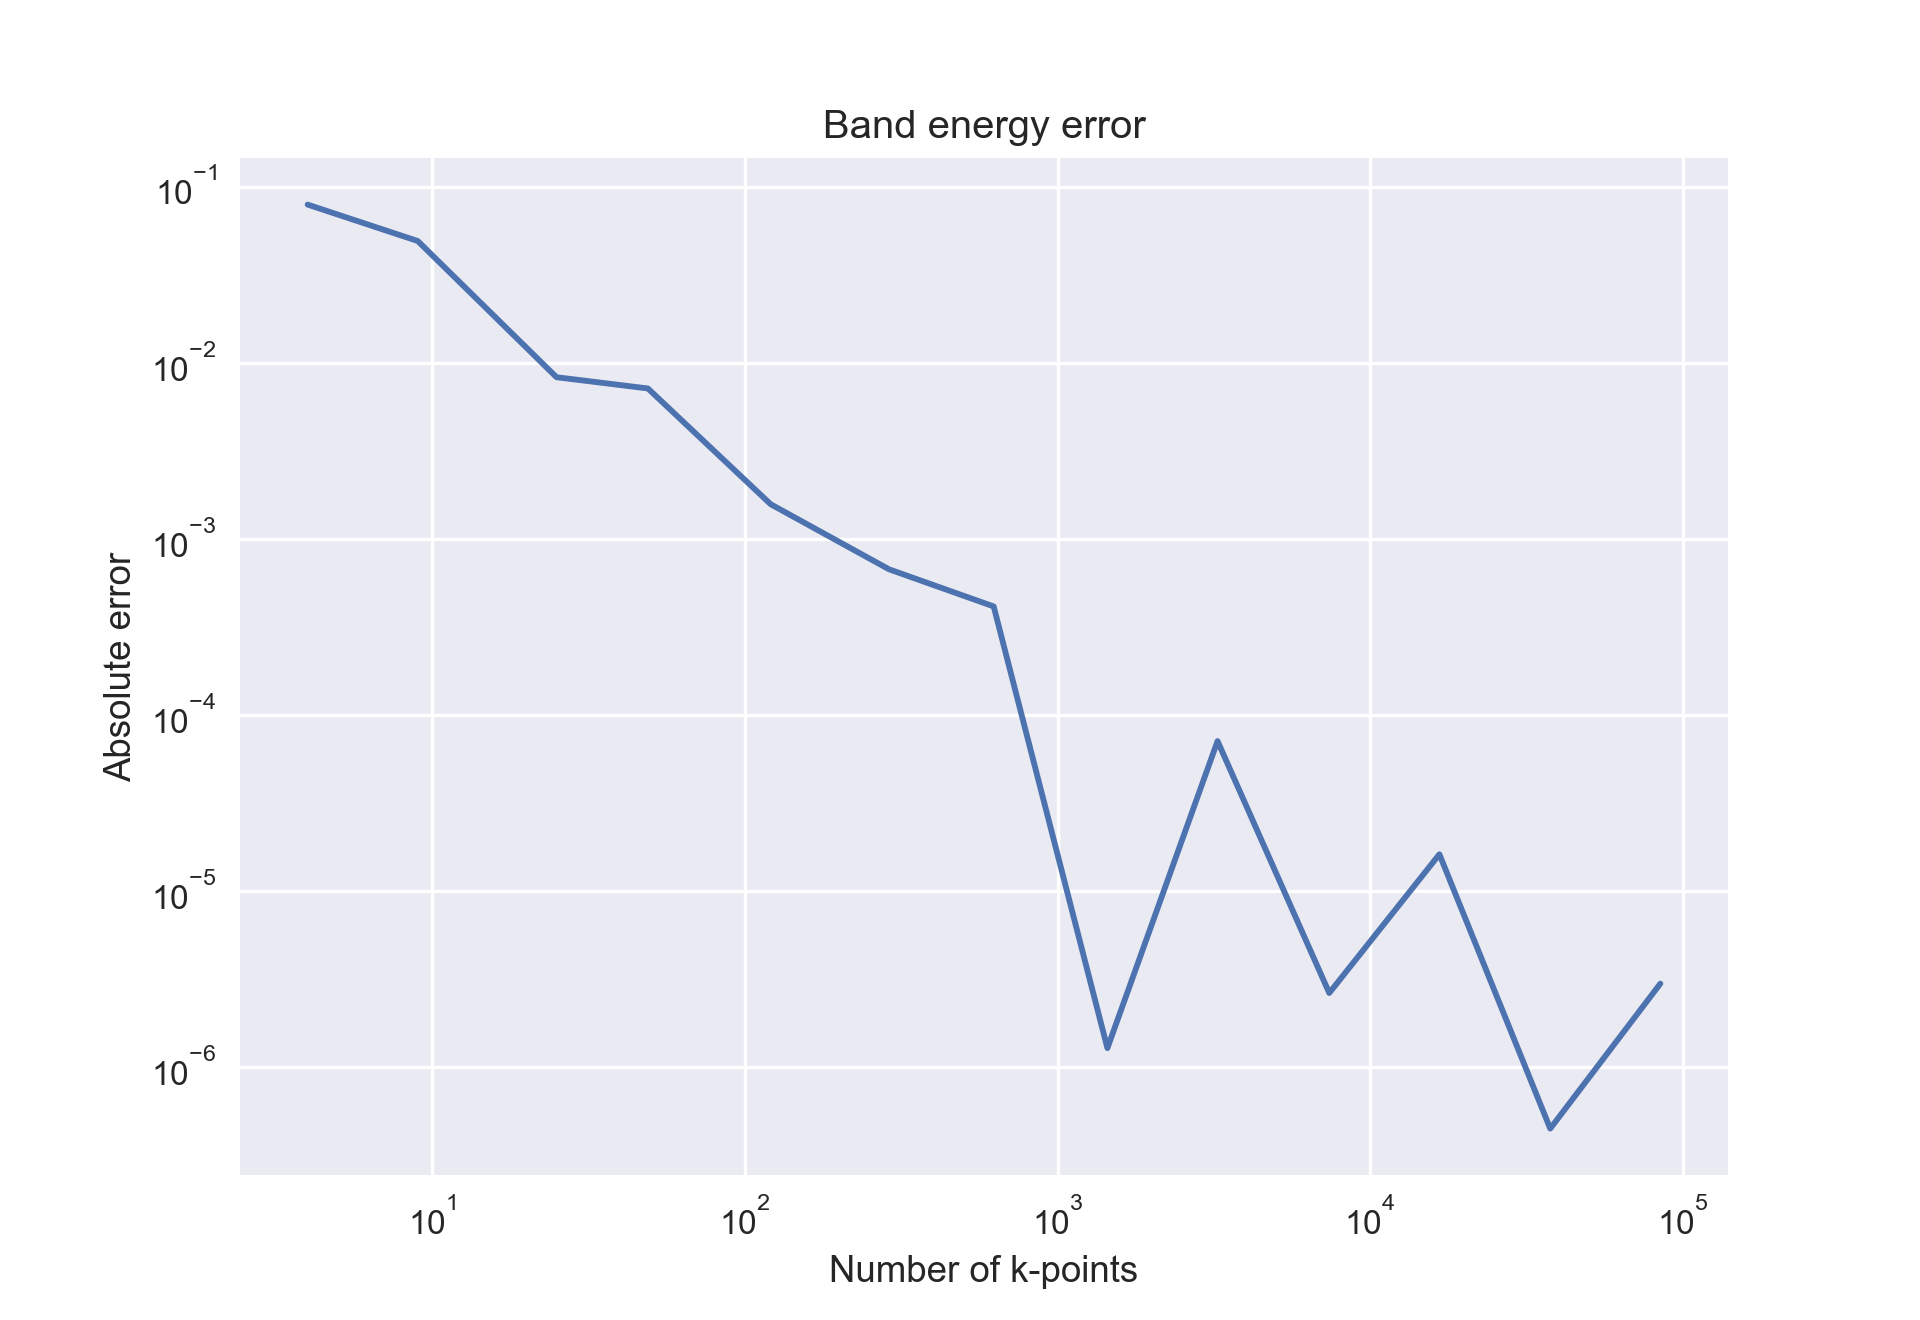

In [24]:
plt.loglog(ndivisions**2, band_energy_error_list)
plt.xlabel("Number of k-points")
plt.ylabel("Absolute error")
plt.title("Band energy error")
plt.show()

<IPython.core.display.Javascript object>


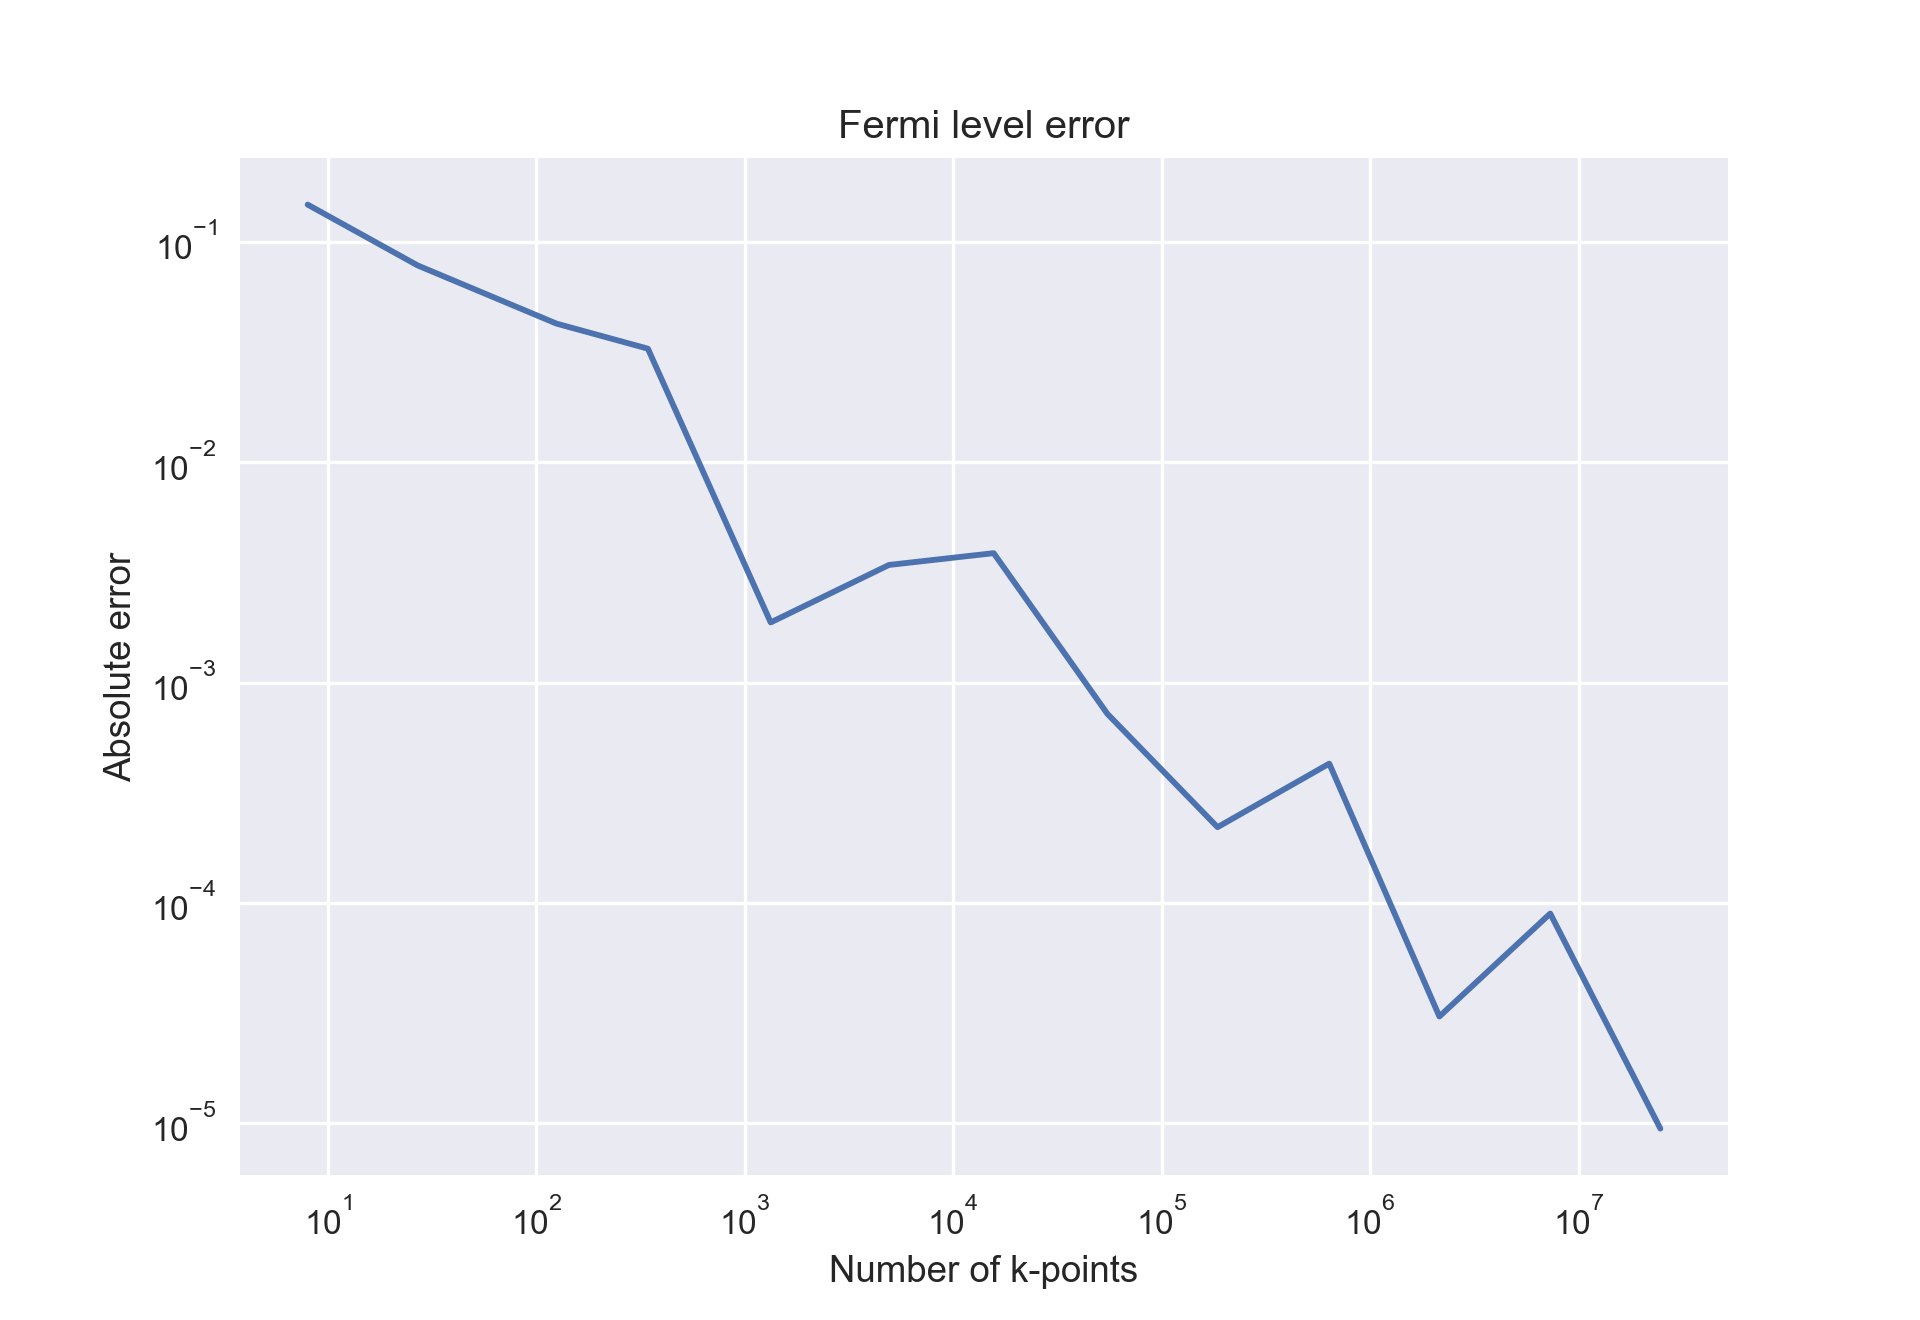

In [25]:
plt.loglog(ndivisions**3, fermi_level_error_list)
plt.xlabel("Number of k-points")
plt.ylabel("Absolute error")
plt.title("Fermi level error")
plt.show()